In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
!pip install arabic-reshaper
!pip install python-bidi
!pip install pandas-profiling
import arabic_reshaper
from bidi.algorithm import get_display
from pandas_profiling import ProfileReport


In [ ]:
def get_top_50_names(names,Areaa):
    i = Areaa
    name_neighbour_above_50 = []
    number_of_sales_above_50 = []

    for name in names:
        Count = i.loc[df_clean['Neighbourhood'] == name]
        count = Count.shape[0]
        if count > 50:
            name_neighbour_above_50.append(name)
            number_of_sales_above_50.append(count)

    return name_neighbour_above_50, number_of_sales_above_50


In [11]:
def calculate_average_price(name_list, data_frame):
    averages = []
    for name in name_list:
        neighborhood_data = data_frame.loc[df_clean['Neighbourhood'] == name]
        average_price = neighborhood_data['Price_per_meter'].mean()
        averages.append(average_price)
    return averages


In [12]:
df= pd.read_csv('../Data/real_state_riyadh.csv')

In [13]:
df.head()

,Neighbourhood,Plannedـtransactionـdetails,Detailsـtransaction,Date,transactionـnumber,Total_price,Area,Price_per_meter
0,10186 فى/ 28/ 7/ 142…,مخطط/3738,قطعة 176,"Thursday, 13 January 2022",15906251,834782.0,642.14,1300.00
1,10186 فى/ 28/ 7/ 142…,مخطط/3738,قطعة 178,"Thursday, 13 January 2022",15906446,780000.0,600.00,1300.00
2,10186 فى/ 28/ 7/ 142…,مخطط/3738,قطعة 180,"Thursday, 13 January 2022",15906513,780000.0,600.00,1300.00
3,10186 فى/ 28/ 7/ 142…,مخطط/3738,قطعة 182,"Thursday, 13 January 2022",15906597,780000.0,600.00,1300.00
4,10186 فى/ 28/ 7/ 142…,مخطط/3738,قطعة 184,"Thursday, 13 January 2022",15906669,772688.0,594.38,1300.00


In [14]:
#Apply the essential EDA steps: head, shape, info, describe, missing values
print('''
    shape of the dataFrame {}
    info for the dataFrame {}
    Null value {}
'''.format(df.shape,df.info,df.isnull().sum().sum()))


    shape of the dataFrame (14269, 8)
    info for the dataFrame <bound method DataFrame.info of                Neighbourhood Plannedـtransactionـdetails Detailsـtransaction  \
0      10186 فى/ 28/ 7/ 142…                   مخطط/3738            قطعة 176   
1      10186 فى/ 28/ 7/ 142…                   مخطط/3738            قطعة 178   
2      10186 فى/ 28/ 7/ 142…                   مخطط/3738            قطعة 180   
3      10186 فى/ 28/ 7/ 142…                   مخطط/3738            قطعة 182   
4      10186 فى/ 28/ 7/ 142…                   مخطط/3738            قطعة 184   
...                      ...                         ...                 ...   
14264                  هدبان                   مخطط/2837          قطعة 256/2   
14265                  هدبان                   مخطط/2837          قطعة 257/1   
14266             وادى العرج                   مخطط/3242         قطعة 1965/2   
14267                   واسط                   مخطط/3242         قطعة 1544/1   
14268                 

In [15]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

AttributeError: module networkx has no attribute topological_generations

In [ ]:
unique_names = []
for name in df['Neighbourhood']:
    if name not in unique_names:
        unique_names.append(name)

for name in unique_names:
    print(name)

In [ ]:
# Create a new DataFrame without rows containing names with numbers
df_clean = df[~df['Neighbourhood'].str.contains('\d')]

df_clean

In [16]:
# Droping columns
df_clean.drop('transactionـnumber', inplace=True, axis=1)
df_clean.drop('Plannedـtransactionـdetails', inplace=True, axis=1)
df_clean

NameError: name 'df_clean' is not defined

In [17]:
# df = df.drop(df[df['Neighbourhood'] == '10186 فى/ 28/ 7/ 142…'].index, axis=0)
# df

In [18]:
df_clean['Price_per_meter'] = df_clean['Price_per_meter'].str.replace(',', '')
df_clean['Area'] = df_clean['Area'].str.replace(',', '')
df_clean

NameError: name 'df_clean' is not defined

In [19]:
filtered_df = df_clean.loc[df['Neighbourhood'] == 'الرمال']

NameError: name 'df_clean' is not defined

In [20]:
df_clean['Area']=df_clean['Area'].astype(float)
df_clean['Price_per_meter']=df_clean['Price_per_meter'].astype(float)

NameError: name 'df_clean' is not defined

In [21]:
profile = ProfileReport(df_clean)
profile.to_notebook_iframe()

NameError: name 'df_clean' is not defined

In [22]:
df_clean['Total_price'].sum()

NameError: name 'df_clean' is not defined

In [23]:
df_clean.shape[0]

NameError: name 'df_clean' is not defined

In [24]:
df_clean.isnull().sum()

NameError: name 'df_clean' is not defined

In [25]:
# df.to_csv('/Users/majed-abdulkareem/Desktop/laps/Bootcamp-Project-2-Data-Analysis/Data/SAles.csv')

In [26]:
Area_under300 = df_clean[df_clean['Area'] < 300]
AreaBetween300_600 = df_clean[df_clean['Area'].between(300,600)]
AreaAbove_600 = df_clean[df_clean['Area']>600]

NameError: name 'df_clean' is not defined

In [27]:

Areas = [Area_under300.shape[0], AreaBetween300_600.shape[0], AreaAbove_600.shape[0]]
Area_size = ['less than 300m', 'between 300m & 600m', 'Above 600m']

plt.figure(figsize=(8, 6))  # Set the figure size (width, height)

plt.bar(Area_size, Areas, width=0.5)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Sales', fontsize=12)

for i, area in enumerate(Areas):
    plt.text(i, area, str(area), ha='center', va='bottom')

plt.title('Number of Sales by Area Size', fontsize=14)
plt.tight_layout()

# Add legend
legend_labels = ['Number of Sales']
plt.legend(legend_labels, loc='upper right')

plt.show()


NameError: name 'Area_under300' is not defined

In [28]:
plt.figure(figsize=(15, 6))  # Set the figure size (width, height)

plt.pie(Areas, labels=Area_size, autopct='%1.1f%%')
plt.title('Sales Distribution', fontsize=14)

plt.show()

NameError: name 'Areas' is not defined

<Figure size 1500x600 with 0 Axes>

In [29]:
unique_names300to600 = []
for name in AreaBetween300_600['Neighbourhood']:
    if name not in unique_names300to600:
        unique_names300to600.append(name)

name_neighbour_above_50, number_of_sales_above_50 = get_top_50_names(unique_names300to600,AreaBetween300_600)
print(name_neighbour_above_50)




NameError: name 'AreaBetween300_600' is not defined

In [30]:
unique_names600 = []
for name in AreaAbove_600['Neighbourhood']:
    if name not in unique_names600:
        unique_names600.append(name)
name_neighbour_50_600, number_of_sales_50_600 = get_top_50_names(unique_names600,AreaAbove_600)
print(name_neighbour_50_600)


NameError: name 'AreaAbove_600' is not defined

In [31]:
#between 300 to 600

# Reshape and format the Arabic labels
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in name_neighbour_above_50]

# Plotting code
plt.figure(figsize=(8, 6))  # Set the figure size

plt.bar(reshaped_labels, number_of_sales_above_50, label='Neighbourhood')  # Add label for the legend
plt.xlabel('Neighbourhood', fontsize=12)  # Set x-label with font size
plt.ylabel('Sales', fontsize=12)  # Set y-label with font size
plt.xticks(rotation='vertical')
for i, name in enumerate(number_of_sales_above_50):
    plt.text(i, name, str(name), ha='center', va='bottom')

plt.title('Sales Distribution by Neighbourhood', fontsize=14)  # Add title with font size
plt.legend(fontsize=10)  # Add legend with font size

plt.show()


NameError: name 'name_neighbour_above_50' is not defined

In [32]:
reshaped_labels2 = [get_display(arabic_reshaper.reshape(label)) for label in name_neighbour_50_600]

plt.figure(figsize=(8, 6))  # Set the figure size

plt.bar(reshaped_labels2, number_of_sales_50_600, label='Sales')  # Plot the bar chart with a label
plt.xlabel('Neighbourhood', fontsize=12)  # Set x-label with font size
plt.ylabel('Sales', fontsize=12)  # Set y-label with font size
plt.xticks(rotation='vertical')

for i, name in enumerate(number_of_sales_50_600):
    plt.text(i, name, str(name), ha='center', va='bottom')  # Add text annotations to the bars

plt.title('Sales Distribution by Neighbourhood', fontsize=14)  # Add title with font size

plt.legend()  # Display the legend

plt.show()

NameError: name 'name_neighbour_50_600' is not defined

NameError: name 'reshaped_labels' is not defined

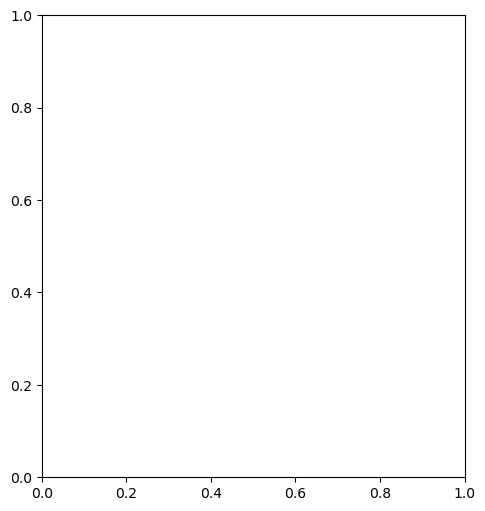

In [33]:


plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# First subplot: top 50 names
plt.subplot(1, 2, 1)
plt.bar(reshaped_labels, number_of_sales_above_50)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation='vertical', fontsize=10)
plt.title('Neighbourhood Sales 300-600', fontsize=14)
plt.tight_layout()  # Adjust spacing within the subplot
plt.legend(['Sales'], loc='best')

# Second subplot: names with 50 to 600 sales
plt.subplot(1, 2, 2)
plt.bar(reshaped_labels2, number_of_sales_50_600)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation='vertical', fontsize=10)
plt.title('Neighbourhood Sales >600', fontsize=14)
plt.tight_layout()  # Adjust spacing within the subplot
plt.legend(['Sales'], loc='best')

plt.subplots_adjust(wspace=0.5)  # Adjust spacing between subplots

plt.suptitle('Sales by Neighbourhood', fontsize=16, x=0.52, y=1)  # Title for the overall figure

plt.show()


In [ ]:
AVE600 = calculate_average_price(name_neighbour_50_600, AreaAbove_600)

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

plt.bar(reshaped_labels2, AVE600)
plt.xlabel('Neighbourhood name', fontsize=12)
plt.ylabel('Price per meter', fontsize=12)
plt.xticks(rotation='vertical', fontsize=10)
plt.title('Average Price per Meter in Neighbourhoods (Above 600)', fontsize=14)

for i, name in enumerate(AVE600):
    plt.text(i, name, str(round(name)), ha='center', va='bottom')

plt.tight_layout()  # Adjust spacing

plt.legend(['Price per meter'], loc='best')

plt.show()

In [34]:
AVE300_600 = calculate_average_price(name_neighbour_above_50, AreaBetween300_600)

NameError: name 'name_neighbour_above_50' is not defined

In [35]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

plt.bar(reshaped_labels, AVE300_600)
plt.xlabel('Neighbourhood name', fontsize=12)
plt.ylabel('Price per meter', fontsize=12)
plt.xticks(rotation='vertical', fontsize=10)
plt.title('Average Price per Meter in Neighbourhoods (Between 300 and 600)', fontsize=14)

for i, name in enumerate(AVE300_600):
    plt.text(i, name, str(round(name)), ha='center', va='bottom')

plt.tight_layout()  # Adjust spacing

plt.legend(['Price per meter'], loc='best')

plt.show()

NameError: name 'reshaped_labels' is not defined

<Figure size 800x600 with 0 Axes>

# Zainab Part

In [36]:
def months_realEstatesNumber(months):
    
    realEstatesNumber = [] 
    
    #save each month's number of occurrences in the dataset "Date" column
    for month in months:
        realEstatesNumber.append(df_clean["Date"].str.contains(month).sum())
    
    return realEstatesNumber
        
def days_realEstatesNumber(month, days):
    
    realEstatesNumber = []
    
    #save each day's number of occurrences in a specific month in the dataset "Date" column
    for day in days:
        realEstatesNumber.append(df_clean["Date"].str.contains('(?=.*'+month+')(?=.*'+day+')').sum())
        
    return realEstatesNumber

In [37]:
months = ["January","February","March"]
days = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

#create a list that will contains the number of real estates for each month
months_realEstatesNumberList = months_realEstatesNumber(months)

#save the index of the month with the most number of real estates
max_index = months_realEstatesNumberList.index(max(months_realEstatesNumberList))

#retrieve the name of the month with the most number of real estates
max_index_month = months[max_index]

#create a list that will contains the number of real estates for each day of the month saved in max_index_month
days_realEstatesNumberList = days_realEstatesNumber(max_index_month, days)

NameError: name 'df_clean' is not defined

NameError: name 'months_realEstatesNumberList' is not defined

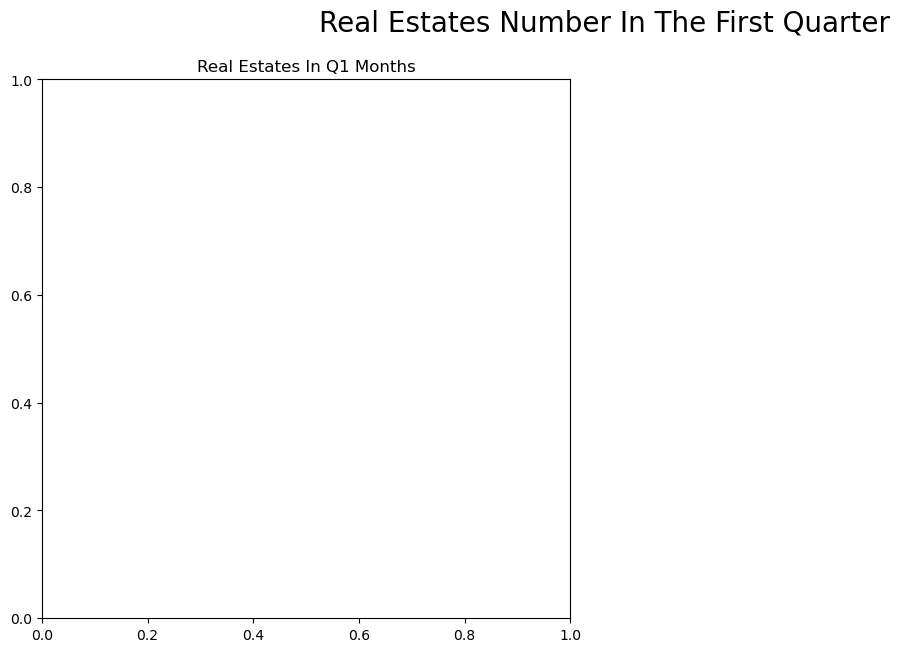

In [38]:
#plot two pie charts using subplot

plt.figure(figsize=[15,7])
plt.suptitle('Real Estates Number In The First Quarter',fontsize = 20)

#first
plt.subplot(1,2,1) 

plt.title('Real Estates In Q1 Months')
plt.pie(months_realEstatesNumberList,labels=months, autopct='%1.1f%%', startangle=90, shadow=True, radius=1, explode = [0.05,0.05,0.05], colors=["cornflowerblue","orange","lightskyblue"])


#second
plt.subplot(1,2,2)

plt.title('Real Estates In '+months[max_index]+' Days')
plt.pie(days_realEstatesNumberList,labels=days, autopct='%1.1f%%', startangle=90, shadow=True, radius=1, explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05], colors=["cornflowerblue","orange","lightskyblue","pink","hotpink","gold","cyan"]);

In [ ]:
#by Amjad
ddf=pd.read_csv(r"'../Data/real_state_riyadh.csv'", usecols= ['Neighbourhood'])

In [39]:
ddf

NameError: name 'ddf' is not defined

In [40]:
#chart 1

In [41]:
count_Neighbourhood=ddf['Neighbourhood'].value_counts()
count_Neighbourhood.head().plot.bar(fontsize=12, color='grey')
plt.title('Top selling residential nighbourhood', fontsize=14, weight="bold")
width_bar = 0.50
plt.show()

NameError: name 'ddf' is not defined

In [42]:
#char 2

In [43]:
ddf['Neighbourhood']=ddf['Neighbourhood'].str.replace('\d+','')

NameError: name 'ddf' is not defined

In [44]:
ddf['Neighbourhood']=ddf['Neighbourhood'].replace(['outside Riyadh'],'معكال')

NameError: name 'ddf' is not defined

In [45]:
ddf['Neighbourhood']=ddf['Neighbourhood'].replace(['مطار الملك خالد الدولي'], 'بنبان')

NameError: name 'ddf' is not defined

In [46]:
count_Neighbourhood_t=ddf['Neighbourhood'].value_counts()
count_Neighbourhood_t.tail(3).plot.bar(fontsize=12, color='grey')
plt.title('count_Neighbourhood', fontsize=14, weight="bold")
width_bar = 0.50
plt.show()

NameError: name 'ddf' is not defined

In [47]:
dedf=pd.read_csv(r"../Data/real_state_riyadh.csv", usecols= ['Total_price','Neighbourhood'])

In [48]:
dedf

,Neighbourhood,Total_price
0,10186 فى/ 28/ 7/ 142…,834782.0
1,10186 فى/ 28/ 7/ 142…,780000.0
2,10186 فى/ 28/ 7/ 142…,780000.0
3,10186 فى/ 28/ 7/ 142…,780000.0
4,10186 فى/ 28/ 7/ 142…,772688.0
...,...,...
14264,هدبان,2099475.0
14265,هدبان,1959510.0
14266,وادى العرج,718750.0
14267,واسط,685000.0


In [49]:
dedf.nlargest(n=5, columns=['Total_price'])

,Neighbourhood,Total_price
10130,التعاون,61854100.0
11541,العليا,50000000.0
12314,الياسمين,50000000.0
10223,الخزامى,49000000.0
2889,بدون,46251885.0
